# Statistical decision theory and trade-offs in the control of motor response - Trommershauser, Maloney, and Landy (2008)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
plt.style.use('dark_background')
import matplotlib.patches as Patches

In [2]:
# personal functions 
def writeGif(filenameG, filenames, supplemental=False):
    
    '''
    Save figure files as gif file and delete figures used to create gif 

    INPUTS:
    filenameG: filename for .gif file 
    filenames: filenames of individual figures to be saved together as gif
    supplemental: put in supplemental or not, boolean

    OUTPUTS:
    .gif file of files in filenmae 
    '''
    import imageio 
    import os 
    import datetime
    import matplotlib

    # current working directory 
    cwd = os.getcwd(); 

    # Does figures folder exist? 
    if os.path.exists(cwd+'/figures') == False: 
        # it doesn't exist
        # create a new figures folder 
        os.mkdir(cwd+'/figures')

    # Make figures folder the current working directory 
    os.chdir(cwd+'/figures')

    # Does current date sub folder exist 
    today = datetime.datetime.now()
    cur_day = today.strftime("%m_%d_%Y")

    # Does current date folder exist? 
    if os.path.exists(cwd+'/figures'+'/'+cur_day) == False:
        # it doesn't exist 
        # create a new date folder 
        os.mkdir(cwd+'/figures'+'/'+cur_day)

    # Make date subfolder the current working directory 
    os.chdir(cwd+'/figures'+'/'+cur_day)

    # Save in supplemental folder ?
    if supplemental:
        if os.path.exists(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental') == False:
            os.mkdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')
        os.chdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')

    with imageio.get_writer(filenameG+'.gif', mode='I',fps=1) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image) # add to gif 
            os.remove(filename) # delete individual 
    
    # Get back to original folder 
    os.chdir(cwd)

def best_save(fig_obj, fig_name, close=True, supplemental=False):
    
    '''
    Save figures easily, compact, and to various places as .png (no friendly with other formats)

    INPUTS:
    fig_obj: figure object, object 
    fig_name: figure name, string 
    close: close figure, boolean 
    supplemental: put in supplemental folder, boolean 

    OUTPUT:
    Save figure in figures folder > date > main or supplemental
    '''

    # import needed library 
    import os 
    import datetime
    import matplotlib

    # current working directory 
    cwd = os.getcwd(); 

    # Does figures folder exist? 
    if os.path.exists(cwd+'/figures') == False: 
        # it doesn't exist
        # create a new figures folder 
        os.mkdir(cwd+'/figures')

    # Make figures folder the current working directory 
    os.chdir(cwd+'/figures')

    # Does current date sub folder exist 
    today = datetime.datetime.now()
    cur_day = today.strftime("%m_%d_%Y")

    # Does current date folder exist? 
    if os.path.exists(cwd+'/figures'+'/'+cur_day) == False:
        # it doesn't exist 
        # create a new date folder 
        os.mkdir(cwd+'/figures'+'/'+cur_day)

    # Make date subfolder the current working directory 
    os.chdir(cwd+'/figures'+'/'+cur_day)

    # Save in supplemental folder ?
    if supplemental:
        if os.path.exists(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental') == False:
            os.mkdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')
        os.chdir(cwd+'/figures'+'/'+cur_day+'/'+'Supplemental')

    # Save 
    if '.png' in fig_name:
        fig_obj.savefig(fig_name, bbox_inches='tight', dpi=300)
    else:
        fig_obj.savefig(fig_name+'.png', bbox_inches='tight', dpi=300)

    if close: # close 
        matplotlib.pyplot.close(fig_obj)

    # Get back to original folder 
    os.chdir(cwd)

In [3]:
# create circles 
def circleXY(c,r,n=100):
    '''
    Find x and y values of a circle with given center (c) and radius (r)

    INPUTS:
    c: center, array or list of floats 
    r: radius, float 
    n: granularity, int

    OUTPUT:
    X/Y: x and y values of circle 
    '''
    th = np.linspace(0, 2*np.pi, num=n)
    X = r * np.cos(th) + c[0]
    Y = r * np.sin(th) + c[1]
    return X, Y

In [4]:
# create agent 
def agent(aim, sd):
    reachX = np.random.normal(aim[0], sd/1.25) # sd/1.25 works to make euclidean error 5.6 at high N 
    reachY = np.random.normal(aim[1], sd/1.25)
    return reachX,reachY

In [5]:
def eucD(P1, P2):
    return np.sqrt((P2[0] - P1[0])**2 + (P2[1] - P1[1])**2)

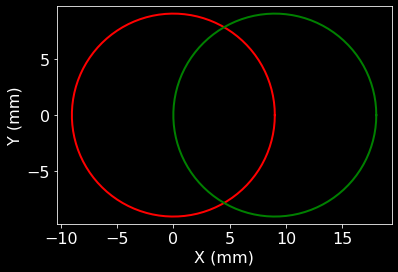

In [6]:
# Set up 
penC = np.array([0,0])
rewC = np.array([9,0])
rad = 9
penX,penY = circleXY(penC, rad)
rewX,rewY = circleXY(rewC, rad)
nreaches = 500

plt.figure()
plt.plot(penX, penY, c='r', lw=2)
plt.plot(rewX, rewY, c='g', lw=2)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.axis('equal')
plt.show()

### Penalty = 0 (hardcode)

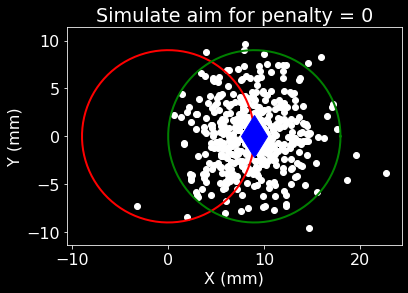

In [7]:
# aim at center of green 
sd = 4.2 # mm
aimed1 = np.array([9, 0]) # mm
# initialize visualization 
plt.figure()
plt.plot(penX, penY, c='r', lw=2)
plt.plot(rewX, rewY, c='g', lw=2)
plt.plot(aimed1[0], aimed1[1], c='b', marker='d', markersize=30)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.axis('equal')
plt.title('Simulate aim for penalty = 0')

# reaches 
reachX, reachY = np.zeros(nreaches), np.zeros(nreaches)
for i in range(nreaches):
    reachX[i], reachY[i] = agent(aimed1, sd)

# finalize visualization 
plt.scatter(reachX, reachY, c='w')
plt.show()

In [8]:
# Check simulation 

# mean euclidean error
er = np.zeros(nreaches)
for i in range(nreaches):
    er[i] = eucD(aimed1, np.array([reachX[i], reachY[i]]))

print(f'Mean Euclidean error = {np.mean(er):.3f}') # should be 5.6 

# green only, red only, green and red, !green and !red 
green_only = 0 
red_only = 0 
green_n_red = 0
green_u_red = 0
for i in range(nreaches):
    distGreen = eucD(rewC, np.array([reachX[i], reachY[i]]))
    distRed = eucD(penC, np.array([reachX[i], reachY[i]]))
    if distGreen < rad and distRed >= rad: # green only 
        green_only += 1
    elif distGreen >= rad and distRed < rad: # red only 
        red_only += 1
    elif distGreen < rad and distRed < rad: # green and red 
        green_n_red += 1
    elif distGreen >= rad and distRed >= rad: # !green and !red 
        green_u_red += 1
print(f'{green_only/nreaches:.2f}, +2.5 cents') # green only 
print(f'{green_n_red/nreaches:.2f}, -10 cents') # green and red  
print(f'{red_only/nreaches:.2f}, -12.5 cents') # red only 
print(f'{green_u_red/nreaches:.2f}, 0 cents') # !green and !red

Mean Euclidean error = 4.078
0.55, +2.5 cents
0.43, -10 cents
0.00, -12.5 cents
0.02, 0 cents


### Penalty = 100 (hardcode)

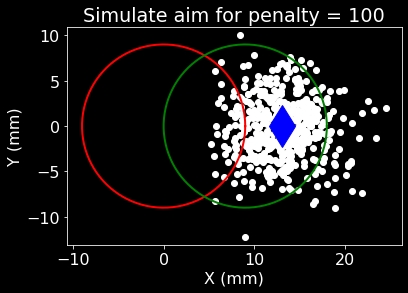

In [9]:
# aim at center of green 
sd = 4.2 # mm
aimed1 = np.array([13, 0]) # mm
# initialize visualization 
plt.figure()
plt.plot(penX, penY, c='r', lw=2)
plt.plot(rewX, rewY, c='g', lw=2)
plt.plot(aimed1[0], aimed1[1], c='b', marker='d', markersize=30)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.axis('equal')
plt.title('Simulate aim for penalty = 100')

# reaches 
reachX, reachY = np.zeros(nreaches), np.zeros(nreaches)
for i in range(nreaches):
    reachX[i], reachY[i] = agent(aimed1, sd)

# finalize visualization 
plt.scatter(reachX, reachY, c='w')
plt.show()

In [10]:
# Check simulation 

# mean euclidean error
er = np.zeros(nreaches)
for i in range(nreaches):
    er[i] = eucD(aimed1, np.array([reachX[i], reachY[i]]))

print(f'Mean Euclidean error = {np.mean(er):.3f}') # should be 5.6 

# green only, red only, green and red, !green and !red 
green_only = 0 
red_only = 0 
green_n_red = 0
green_u_red = 0
for i in range(nreaches):
    distGreen = eucD(rewC, np.array([reachX[i], reachY[i]]))
    distRed = eucD(penC, np.array([reachX[i], reachY[i]]))
    if distGreen < rad and distRed >= rad: # green only 
        green_only += 1
    elif distGreen >= rad and distRed < rad: # red only 
        red_only += 1
    elif distGreen < rad and distRed < rad: # green and red 
        green_n_red += 1
    elif distGreen >= rad and distRed >= rad: # !green and !red 
        green_u_red += 1
print(f'{green_only/nreaches:.2f}, +2.5 cents') # green only 
print(f'{green_n_red/nreaches:.2f}, -10 cents') # green and red  
print(f'{red_only/nreaches:.2f}, -12.5 cents') # red only 
print(f'{green_u_red/nreaches:.2f}, 0 cents') # !green and !red

Mean Euclidean error = 4.240
0.80, +2.5 cents
0.09, -10 cents
0.00, -12.5 cents
0.11, 0 cents


### Penalty = 500 (hardcode)

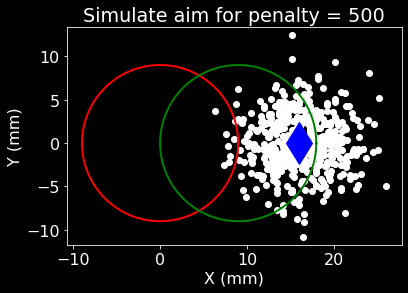

In [11]:
# aim at center of green 
sd = 4.2 # mm
aimed1 = np.array([16, 0]) # mm
# initialize visualization 
plt.figure()
plt.plot(penX, penY, c='r', lw=2)
plt.plot(rewX, rewY, c='g', lw=2)
plt.plot(aimed1[0], aimed1[1], c='b', marker='d', markersize=30)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.axis('equal')
plt.title('Simulate aim for penalty = 500')

# reaches 
reachX, reachY = np.zeros(nreaches), np.zeros(nreaches)
for i in range(nreaches):
    reachX[i], reachY[i] = agent(aimed1, sd)

# finalize visualization 
plt.scatter(reachX, reachY, c='w')
plt.show()

In [12]:
# Check simulation 

# mean euclidean error
er = np.zeros(nreaches)
for i in range(nreaches):
    er[i] = eucD(aimed1, np.array([reachX[i], reachY[i]]))

print(f'Mean Euclidean error = {np.mean(er):.3f}') # should be 5.6 

# green only, red only, green and red, !green and !red 
green_only = 0 
red_only = 0 
green_n_red = 0
green_u_red = 0
for i in range(nreaches):
    distGreen = eucD(rewC, np.array([reachX[i], reachY[i]]))
    distRed = eucD(penC, np.array([reachX[i], reachY[i]]))
    if distGreen < rad and distRed >= rad: # green only 
        green_only += 1
    elif distGreen >= rad and distRed < rad: # red only 
        red_only += 1
    elif distGreen < rad and distRed < rad: # green and red 
        green_n_red += 1
    elif distGreen >= rad and distRed >= rad: # !green and !red 
        green_u_red += 1
print(f'{green_only/nreaches:.2f}, +2.5 cents') # green only 
print(f'{green_n_red/nreaches:.2f}, -10 cents') # green and red  
print(f'{red_only/nreaches:.2f}, -12.5 cents') # red only 
print(f'{green_u_red/nreaches:.2f}, 0 cents') # !green and !red

Mean Euclidean error = 4.262
0.61, +2.5 cents
0.01, -10 cents
0.00, -12.5 cents
0.37, 0 cents


## Stimuli

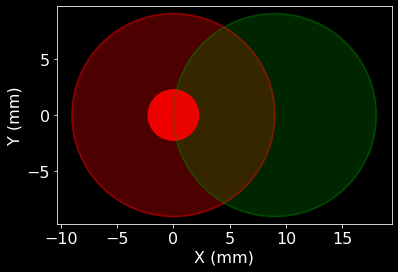

In [13]:
# Set up 
penC = np.array([0,0])
rewC = np.array([9,0])
rad = 9
penX,penY = circleXY(penC, rad)
rewX,rewY = circleXY(rewC, rad)
nreaches = 500

fig = plt.figure()
# outline 
plt.plot(penX, penY, c='r', lw=2, alpha=0.3)
plt.plot(rewX, rewY, c='g', lw=2, alpha=0.3)
# color in 
ax = plt.gca()
ax.add_patch(Patches.Circle(penC, rad, color='r', alpha=0.3))
ax.add_patch(Patches.Circle(rewC, rad, color='g', alpha=0.3))
ax.add_patch(Patches.Circle(penC, rad/4, color='r', alpha=0.9))
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.axis('equal')
plt.show()

best_save(fig, 'targets')

In [14]:
def px2mm(px):
    return px / 3.55

In [15]:
w,h = px2mm(1280), px2mm(1024)

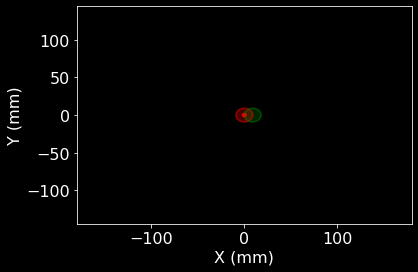

In [16]:
# Set up 
penC = np.array([0,0])
rewC = np.array([9,0])
rad = 9
penX,penY = circleXY(penC, rad)
rewX,rewY = circleXY(rewC, rad)
nreaches = 500

plt.figure()
# outline 
plt.plot(penX, penY, c='r', lw=2, alpha=0.3)
plt.plot(rewX, rewY, c='g', lw=2, alpha=0.3)
# color in 
ax = plt.gca()
ax.add_patch(Patches.Circle(penC, rad, color='r', alpha=0.3))
ax.add_patch(Patches.Circle(rewC, rad, color='g', alpha=0.3))
ax.add_patch(Patches.Circle(penC, rad/4, color='r', alpha=0.9))
plt.xlim([-w/2,w/2])
plt.ylim([-h/2,h/2])
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.show()

In [17]:
startX, startY = np.random.uniform(low=-44, high=44, size=(5,)), np.random.uniform(low=-44, high=44, size=(5,))

fnames = []

for i in range(5):
    fig = plt.figure()
    # Set up 
    penC = np.array([startX[i],startY[i]])
    rewC = np.array([startX[i]+9,startY[i]])
    rad = 9
    penX,penY = circleXY(penC, rad)
    rewX,rewY = circleXY(rewC, rad)
    
    # outline 
    plt.plot(penX, penY, c='r', lw=2, alpha=0.3)
    plt.plot(rewX, rewY, c='g', lw=2, alpha=0.3)
    # color in 
    ax = plt.gca()
    ax.add_patch(Patches.Circle(penC, rad, color='r', alpha=0.3))
    ax.add_patch(Patches.Circle(rewC, rad, color='g', alpha=0.3))
    ax.add_patch(Patches.Circle(penC, rad/4, color='r', alpha=0.9))
    plt.xlim([-w/2,w/2])
    plt.ylim([-h/2,h/2])
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')

    filename = f'{i}.png'
    fnames.append(filename)
    best_save(fig, filename)

writeGif('randomTargs', fnames)

## Table 1. (as figure)

In [18]:
# data 
sig2mm2 = [8.0555, 15.233, 15.6025, 15.9275, 22.9555, 18.786]
rtMu = [211, 232, 264, 277, 237, 203]
rtSig = [17, 23, 18, 17, 35, 15]
mtMu = [412, 426, 352, 331, 356, 403]
mtSig = [23, 19, 29, 19, 17, 12]

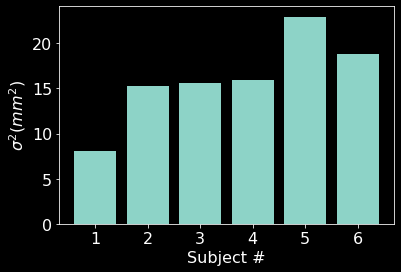

In [19]:
# sig2
fig = plt.figure()
x = [1,2,3,4,5,6]
plt.bar(x, sig2mm2)
plt.xticks(x)
plt.ylabel('$\sigma^2 (mm^2)$')
plt.xlabel('Subject #')
plt.show()

best_save(fig, 'sig2')

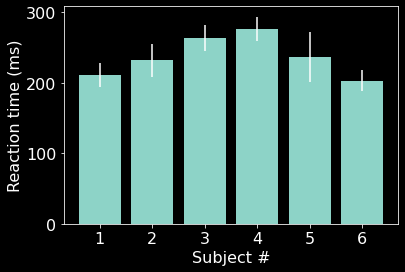

In [20]:
# Reaction time
fig = plt.figure()
plt.bar(x, rtMu)
plt.errorbar(x, rtMu, rtSig, c='w', ls='')
plt.xticks(x)
plt.ylabel('Reaction time (ms)')
plt.xlabel('Subject #')
plt.show() 

best_save(fig, 'rt')

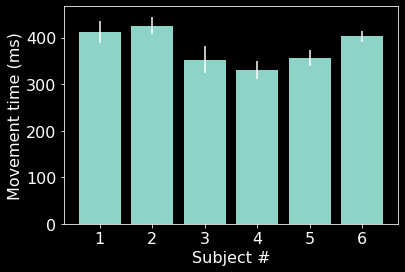

In [21]:
# Movement time
fig = plt.figure()
plt.bar(x, mtMu)
plt.errorbar(x, mtMu, mtSig, c='w', ls='')
plt.xticks(x)
plt.ylabel('Movement time (ms)')
plt.xlabel('Subject #')
plt.show() 

best_save(fig, 'mt')

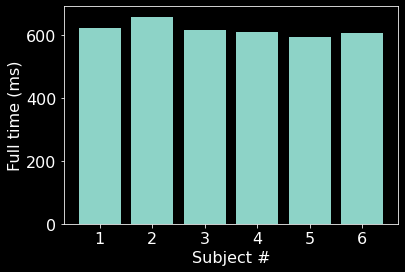

In [28]:
# Time from onset to touch 
fig = plt.figure()
plt.bar(x, np.array(rtMu)+np.array(mtMu))
plt.xticks(x)
plt.ylabel('Full time (ms)')
plt.xlabel('Subject #')
plt.show()

## Table 2 (figures)

In [22]:
# data 
score = [15700, 14400, 15500, 14600, 12700, 14800]
optPMu = [17058, 14887, 14769, 14751, 12625, 13841]
optPSig = [425, 668, 650, 662, 804, 816]
eff = (np.array(score) / np.array(optPMu)) * 100

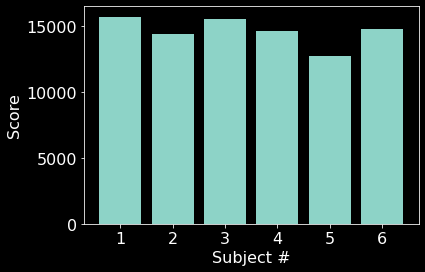

In [23]:
# scores 
fig = plt.figure()
plt.bar(x, score)
plt.xticks(x)
plt.xlabel('Subject #')
plt.ylabel('Score')
plt.show()

best_save(fig, 'score')

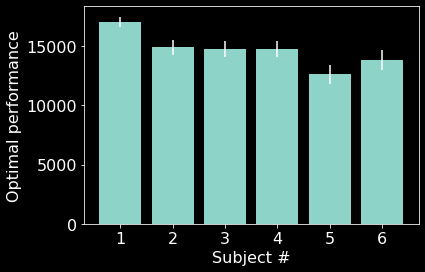

In [24]:
# optimal performance  
fig = plt.figure()
plt.bar(x, optPMu)
plt.errorbar(x, optPMu, optPSig, ls='', c='w')
plt.xticks(x)
plt.xlabel('Subject #')
plt.ylabel('Optimal performance')
plt.show()

best_save(fig, 'optP')

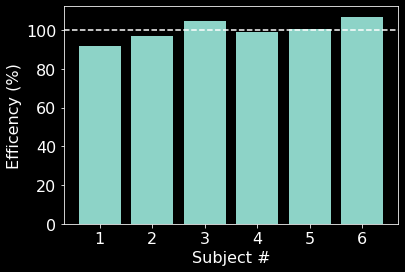

In [25]:
# Efficiency 
fig = plt.figure()
plt.bar(x, eff)
plt.xticks(x)
plt.axhline(100, c='w', ls='--')
plt.xlabel('Subject #')
plt.ylabel('Efficency (%)')
plt.show()

best_save(fig, 'eff')